In [145]:
import pandas as pd

# Načtení datového souboru
file_path = "Ze3.dat"

# Pokusme se soubor načíst a zjistit jeho strukturu
with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
    lines = file.readlines()

# Zobrazíme prvních několik řádků pro analýzu formátu
lines[:10]

['427.0000  4128.00\n',
 '427.0562  4455.00\n',
 '427.1124  5876.00\n',
 '427.1686  9341.00\n',
 '427.2248  14757.00\n',
 '427.2810  21369.00\n',
 '427.3372  22750.00\n',
 '427.3934  17461.00\n',
 '427.4496  11767.00\n',
 '427.5058  7660.00\n']

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2098738279.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=["lambda_nm", "intensity"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2098738279.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


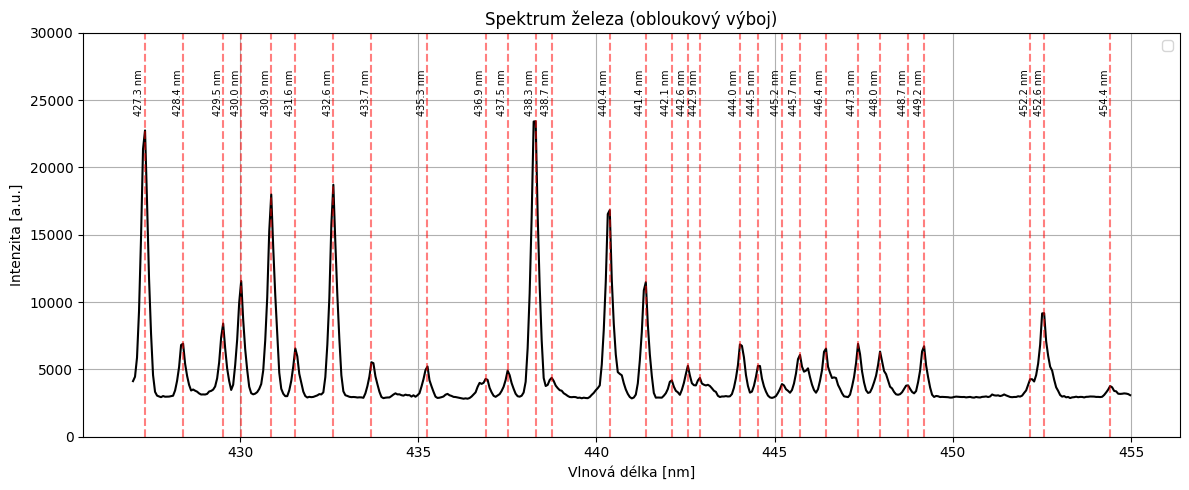

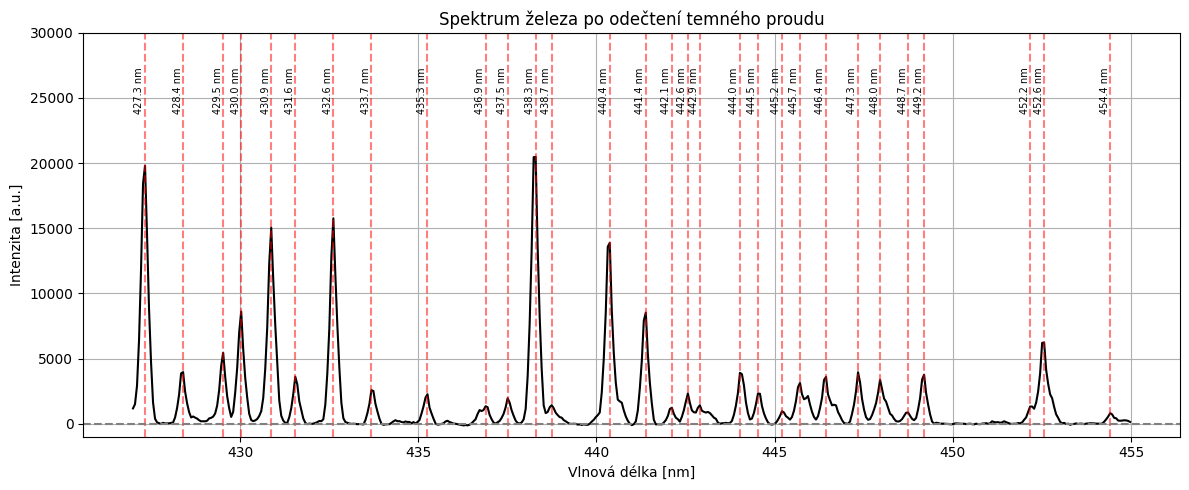

In [146]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import peak_widths

# Načteme data do DataFrame
df = pd.read_csv(file_path, delim_whitespace=True, names=["lambda_nm", "intensity"])

# Najdeme lokální maxima v intenzitě
peaks, _ = find_peaks(df["intensity"], height=3600, distance=5)

# Vytvoříme DataFrame s pozicemi čar
peak_df = df.iloc[peaks].reset_index(drop=True)
peak_df.columns = ["lambda_nm", "intensity"]

# Seřadíme čáry podle intenzity
peak_df_sorted = peak_df

# Zobrazíme prvních 20 čar pro přehled

# Vykreslení spektra
plt.figure(figsize=(12, 5))
plt.plot(df["lambda_nm"], df["intensity"], color='black')
#plt.scatter(peak_df["lambda_nm"], peak_df["intensity"], color='red', label='Čáry')
for i in range(len(peak_df)):
    plt.annotate(f"{peak_df_sorted['lambda_nm'][i]:.1f} nm", 
                 (peak_df_sorted["lambda_nm"][i], 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(peak_df_sorted["lambda_nm"][i], color='red', linestyle='--', alpha=0.5)
#plt.axvline(peak_df["lambda_nm"], color='blue', linestyle='--', label='Průměrná vlnová délka čar')
plt.legend()
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum železa (obloukový výboj)")
plt.ylim(0,30000)
plt.grid(True)
plt.tight_layout()
plt.show()

#Odečtení temného proudu
# Temný proud odhadneme jako průměr intenzity v oblasti okolo 450 nm, kde není žádná silná čára
dark_current_region = df[(df["lambda_nm"] >= 449.5) & (df["lambda_nm"] <= 450.5)]
dark_current = dark_current_region["intensity"].mean()

# Odečteme temný proud od celého spektra
df["intensity_corr"] = df["intensity"] - dark_current

# Vykreslení korigovaného spektra
plt.figure(figsize=(12, 5))
plt.plot(df["lambda_nm"], df["intensity_corr"], color='black')
for i in range(len(peak_df)):
    plt.annotate(f"{peak_df_sorted['lambda_nm'][i]:.1f} nm", 
                 (peak_df_sorted["lambda_nm"][i], 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(peak_df_sorted["lambda_nm"][i], color='red', linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum železa po odečtení temného proudu")
plt.ylim(-1000, 30000)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\528958859.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  iron_table = pd.read_csv(StringIO(iron_lines_raw), delim_whitespace=True, names=["lambda_nm_ref", "Em_eV", "A_gm"])


    lambda_nm     intensity  FWHM_nm  lambda_nm_ref  Em_eV    A_gm
0    429.5289   5451.388889   0.1686        429.413  4.371  0.7100
1    430.0347   8610.388889   0.1686        429.924  5.308  5.2000
2    430.8777  15041.388889   0.2248        430.791  4.434  5.9000
3    431.5521   3606.388889   0.1686        431.509  5.070  1.5000
4    432.6198  15763.388889   0.1687        432.576  4.473  6.1000
5    433.6876   2578.388889   0.2248        433.705  4.415  0.2300
6    435.2611   2262.388889   0.2248        435.274  5.070  1.0000
7    437.5088   1956.388889   0.2248        437.593  2.832  0.0094
8    438.2954  20480.388889   0.2247        438.357  4.312  7.7000
9    440.3742  13880.388889   0.2247        440.475  4.371  4.4000
10   441.3855   8525.388889   0.2248        441.512  4.415  2.8000
11   442.5652   2317.388889   0.1685        442.731  2.851  0.0099
12   444.0256   3902.388889   0.2247        444.234  4.988  1.1000
13   444.5311   2309.388889   0.2247        444.772  5.009  1.

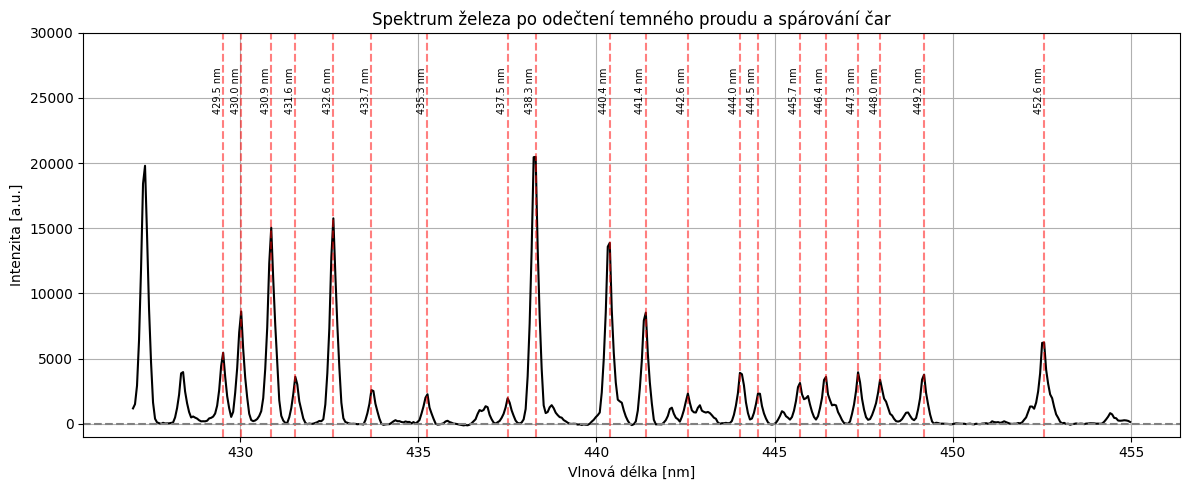

In [147]:
# Vrátíme se k původnímu peak_df (s peaky) a provedeme znovu matching s tabulkou železa

# Původní tabulka železných čar
from io import StringIO

iron_lines_raw = """
429.413 4.371 0.71
429.924 5.308 5.2
430.791 4.434 5.9
431.509 5.070 1.5
432.576 4.473 6.1
433.705 4.415 0.23
435.274 5.070 1.0
436.977 5.882 2.2
437.593 2.832 0.0094
438.357 4.312 7.7
440.475 4.371 4.4
441.512 4.415 2.8
442.731 2.851 0.0099
444.234 4.988 1.1
444.772 5.009 1.1
445.912 4.955 1.0
446.165 2.865 0.0052
446.655 5.606 5.3
447.602 5.614 5.4
448.217 2.875 0.0053
449.457 4.955 1.22
452.862 4.913 1.8
453.115 4.220 0.076
460.294 4.177 0.088
473.678 5.828 2.5
485.975 5.426 1.3
487.132 5.409 3.7
487.215 5.426 2.2
487.822 5.426 0.77
"""
iron_table = pd.read_csv(StringIO(iron_lines_raw), delim_whitespace=True, names=["lambda_nm_ref", "Em_eV", "A_gm"])

# Rebuild peak_df z aktuálních dat
peaks, _ = find_peaks(df["intensity_corr"], height=1500, distance=5)
results_half = peak_widths(df["intensity_corr"], peaks, rel_height=0.5)
left_lambda = df["lambda_nm"].iloc[results_half[2].astype(int)].values
right_lambda = df["lambda_nm"].iloc[results_half[3].astype(int)].values
fwhm_values = right_lambda - left_lambda
peak_df = pd.DataFrame({
    "lambda_nm": df["lambda_nm"].iloc[peaks].values,
    "intensity": df["intensity_corr"].iloc[peaks].values,
    "FWHM_nm": fwhm_values
})

# Spárování s tabulkou železa
tolerance = 0.5
matched_lines = []

for _, row in peak_df.iterrows():
    lamb = row["lambda_nm"]
    candidates = iron_table[(iron_table["lambda_nm_ref"] >= lamb - tolerance) & (iron_table["lambda_nm_ref"] <= lamb + tolerance)]
    if not candidates.empty:
        closest = candidates.iloc[(candidates["lambda_nm_ref"] - lamb).abs().argmin()]
        matched_lines.append({
            "lambda_nm": lamb,
            "intensity": row["intensity"],
            "FWHM_nm": row["FWHM_nm"],
            "lambda_nm_ref": closest["lambda_nm_ref"],
            "Em_eV": closest["Em_eV"],
            "A_gm": closest["A_gm"]
        })

matched_df = pd.DataFrame(matched_lines)
print(matched_df)

#plotting
plt.figure(figsize=(12, 5))
plt.plot(df["lambda_nm"], df["intensity_corr"], color='black')
for i in range(len(matched_df)):
    plt.annotate(f"{matched_df['lambda_nm'][i]:.1f} nm", 
                 (matched_df["lambda_nm"][i], 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(matched_df["lambda_nm"][i], color='red', linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum železa po odečtení temného proudu a spárování čar")
plt.ylim(-1000, 30000)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1880224377.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(region["intensity_corr"], region["lambda_nm"])


Průměrná odchylka vlnové délky: 0.106 ± 0.138 nm
    lambda_nm     intensity  FWHM_nm  lambda_nm_ref  Em_eV    A_gm  \
0    429.5289   5451.388889   0.1686        429.413  4.371  0.7100   
1    430.0347   8610.388889   0.1686        429.924  5.308  5.2000   
2    430.8777  15041.388889   0.2248        430.791  4.434  5.9000   
3    431.5521   3606.388889   0.1686        431.509  5.070  1.5000   
4    432.6198  15763.388889   0.1687        432.576  4.473  6.1000   
5    433.6876   2578.388889   0.2248        433.705  4.415  0.2300   
6    435.2611   2262.388889   0.2248        435.274  5.070  1.0000   
7    437.5088   1956.388889   0.2248        437.593  2.832  0.0094   
8    438.2954  20480.388889   0.2247        438.357  4.312  7.7000   
9    440.3742  13880.388889   0.2247        440.475  4.371  4.4000   
10   441.3855   8525.388889   0.2248        441.512  4.415  2.8000   
11   442.5652   2317.388889   0.1685        442.731  2.851  0.0099   
12   444.0256   3902.388889   0.2247     

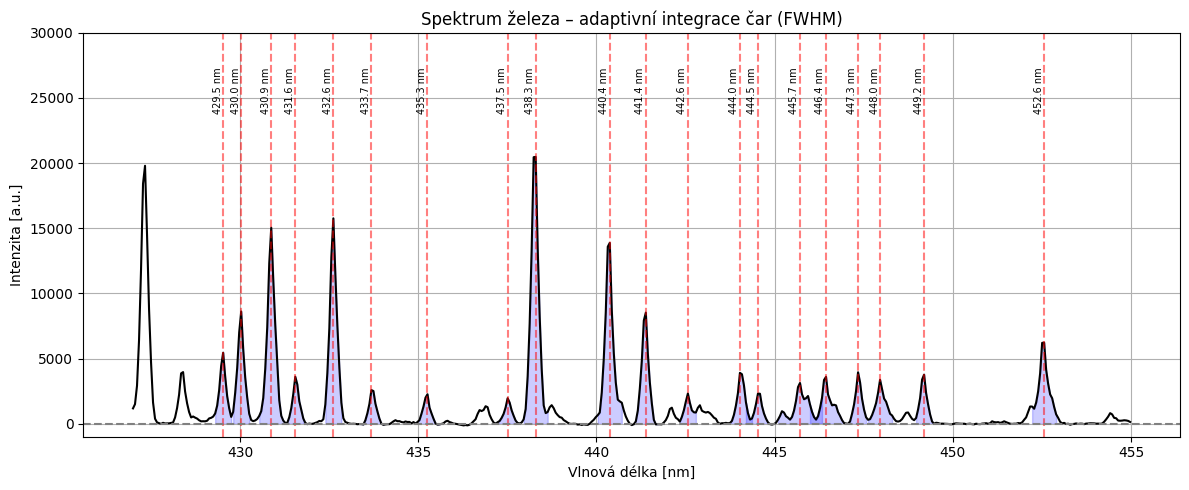

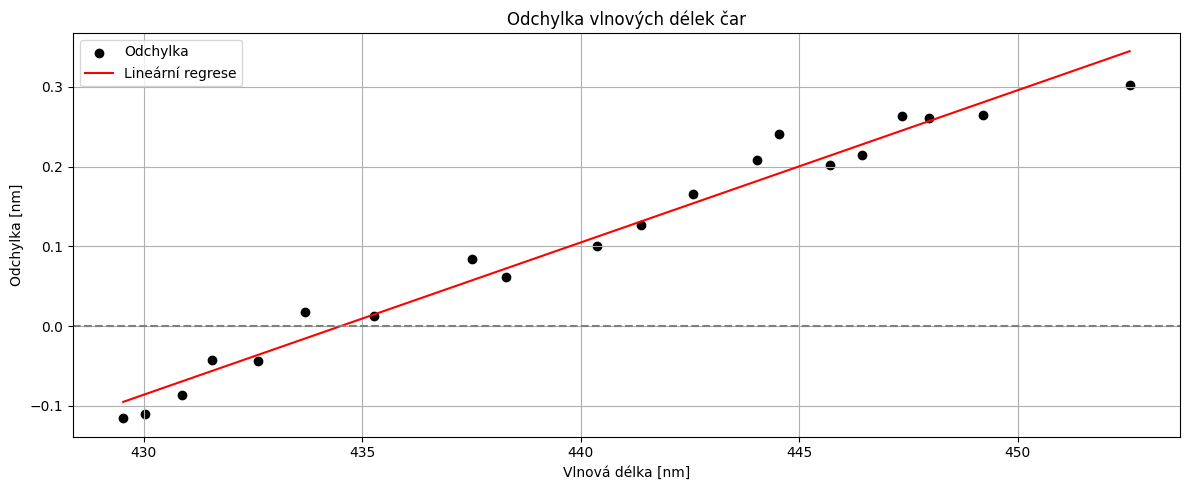

In [148]:
import numpy as np
# Integrace přes adaptivní okno ±1.2 * FWHM / 2
def integrate_dynamic(wavelength, fwhm):
    window = 3.25 * fwhm / 2
    region = df[(df["lambda_nm"] >= wavelength - window) & (df["lambda_nm"] <= wavelength + window)]
    return np.trapz(region["intensity_corr"], region["lambda_nm"])

matched_df["intensity_integrated"] = matched_df.apply(
    lambda row: integrate_dynamic(row["lambda_nm"], row["FWHM_nm"]), axis=1
)

# Odstraníme případné nuly nebo nesmysly
matched_df = matched_df[matched_df["intensity_integrated"] > 0].copy()
matched_df["delta_lambda"] = matched_df["lambda_nm_ref"] - matched_df["lambda_nm"]
delta_lambda_mean = matched_df["delta_lambda"].mean()
delta_lambda_std = matched_df["delta_lambda"].std()
print(f"Průměrná odchylka vlnové délky: {delta_lambda_mean:.3f} ± {delta_lambda_std:.3f} nm")

print(matched_df)
# Vykreslení integrace
plt.figure(figsize=(12, 5))
plt.plot(df["lambda_nm"], df["intensity_corr"], color='black')
for i in range(len(matched_df)):
    lam = matched_df["lambda_nm"].iloc[i]
    fwhm = matched_df["FWHM_nm"].iloc[i]
    window = 3.25 * fwhm / 2
    region = df[(df["lambda_nm"] >= lam - window) & (df["lambda_nm"] <= lam + window)]
    plt.annotate(f"{lam:.1f} nm",
                 (lam, 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(lam, color='red', linestyle='--', alpha=0.5)
    plt.fill_between(region["lambda_nm"], region["intensity_corr"], alpha=0.2, color='blue')


plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum železa – adaptivní integrace čar (FWHM)")
plt.ylim(-1000, 30000)
plt.grid(True)
plt.tight_layout()
plt.show()

#plot delta lambda x lambda
#fit linearní regresi
from sklearn.linear_model import LinearRegression
X = matched_df["lambda_nm"].values.reshape(-1, 1)
y = matched_df["delta_lambda"].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

plt.figure(figsize=(12, 5))
plt.scatter(matched_df["lambda_nm"], matched_df["delta_lambda"], color='black', label='Odchylka')
#plt linregression line
plt.plot(matched_df["lambda_nm"], model.predict(X), color='red', label='Lineární regrese')
plt.legend()
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Odchylka [nm]")
plt.title("Odchylka vlnových délek čar")
plt.grid(True)
plt.tight_layout()
plt.show()



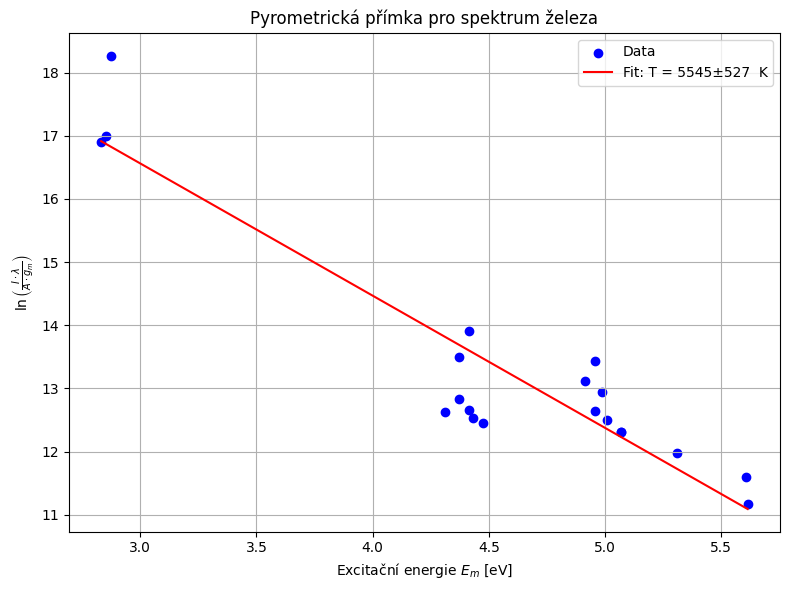

(np.float64(5544.793984897485),
 np.float64(-2.092867318994697),
 np.float64(0.19879615387845292),
 np.float64(526.6859051416023))

In [149]:
# Výpočet hodnot pro pyrometrickou přímku
k_B = 8.617333262145e-5  # Boltzmannova konstanta v eV/K

matched_df["ln_term"] = np.log(
    (matched_df["intensity_integrated"] * matched_df["lambda_nm"]) /
    matched_df["A_gm"]
)

# Proložení přímky ln_term = a * Em_eV + b
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(matched_df["Em_eV"], matched_df["ln_term"])
T_exc = -1 / (slope * k_B)
deltat = std_err/(slope**2 * k_B)

# Vykreslení pyrometrické přímky
plt.figure(figsize=(8, 6))
plt.scatter(matched_df["Em_eV"], matched_df["ln_term"], color='blue', label='Data')
x_vals = np.linspace(matched_df["Em_eV"].min(), matched_df["Em_eV"].max(), 100)
plt.plot(x_vals, slope * x_vals + intercept, color='red', label=f'Fit: T = {T_exc:.0f}±{deltat:.0f}  K')
plt.xlabel("Excitační energie $E_m$ [eV]")
plt.ylabel(r"$\ln\left(\frac{I \cdot \lambda}{A \cdot g_m}\right)$")
plt.title("Pyrometrická přímka pro spektrum železa")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

deltat = std_err/(slope**2 * k_B)

T_exc, slope, std_err, deltat


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1112511930.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_oh = pd.read_csv("03.txt", delim_whitespace=True, names=["lambda_nm", "intensity"])


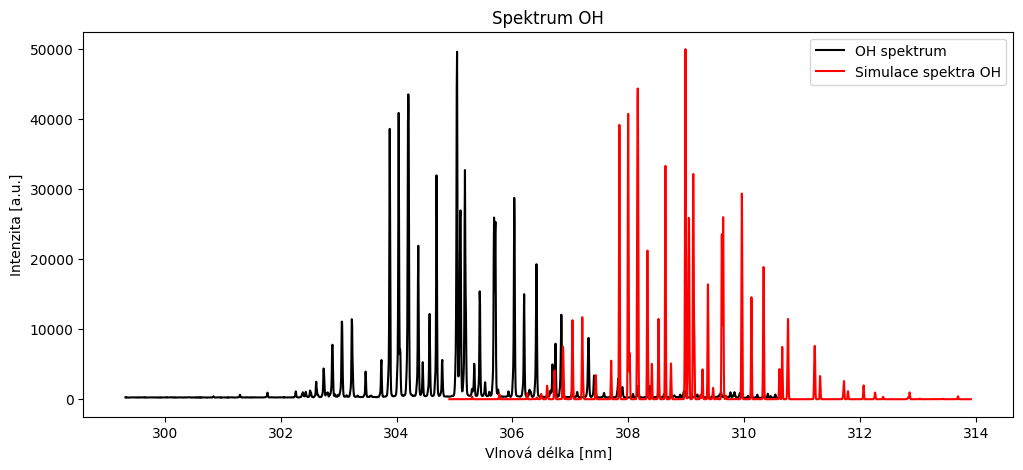

In [150]:
# Po resetu: znovu načteme a zpracujeme OH spektrum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Načtení dat
df_oh = pd.read_csv("03.txt", delim_whitespace=True, names=["lambda_nm", "intensity"])
df_oh = df_oh.dropna()
#print(df_oh.head())


sim = pd.read_csv("sim.txt", delimiter=",", names=["lambda_nm", "intensity"])
sim = sim.dropna()

#print(sim)
sim["lambda_nm"] = sim["lambda_nm"] /10
sim["intensity"] = sim["intensity"] * 500

#plt df_oh
plt.figure(figsize=(12, 5))
plt.plot(df_oh["lambda_nm"], df_oh["intensity"], color='black', label='OH spektrum')
plt.plot(sim["lambda_nm"], sim["intensity"], color='red', label='Simulace spektra OH')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum OH")
plt.legend()

     lambda_nm     intensity  lambda_ref  intensity_ref  delta_lambda
762  303.88242  38622.666656    307.8449       39197.95      -3.96248
788  304.03680  40900.666656    307.9970       40758.60      -3.96020
816  304.20300  43544.333313    308.1620       44390.55      -3.95900
958  305.04437  49638.333313    308.9849       50000.00      -3.94053


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2816656480.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oh_peaks["lambda_nm_corr"] = df_oh_peaks["lambda_nm"] - delta


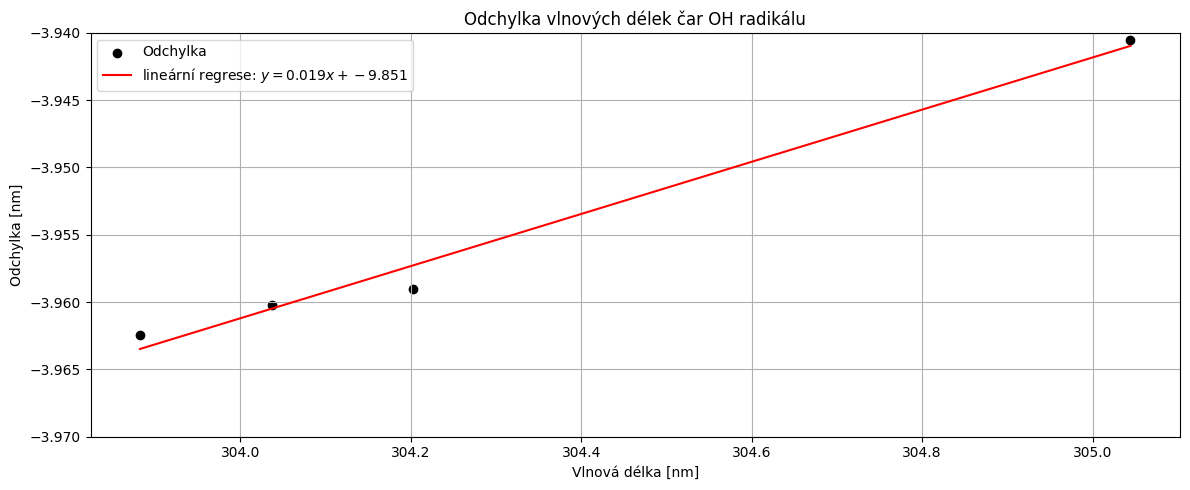

      lambda_nm   intensity  lambda_ref  intensity_ref  delta_lambda  \
0     299.32248  262.333313         NaN            NaN           NaN   
1     299.32852  255.666656         NaN            NaN           NaN   
2     299.33453  296.333313         NaN            NaN           NaN   
3     299.34058  230.000000         NaN            NaN           NaN   
4     299.34659  262.333313         NaN            NaN           NaN   
...         ...         ...         ...            ...           ...   
1896  310.53842  663.000000         NaN            NaN           NaN   
1897  310.54422  447.666656         NaN            NaN           NaN   
1898  310.55002  269.666656         NaN            NaN           NaN   
1899  310.55582  216.666656         NaN            NaN           NaN   
1900  310.56161  228.000000         NaN            NaN           NaN   

      lambda_nm_corr    delta2  lambda_nm_corr2  intensity_corr  
0         303.278032 -4.051828       303.374308        5.082342  
1  

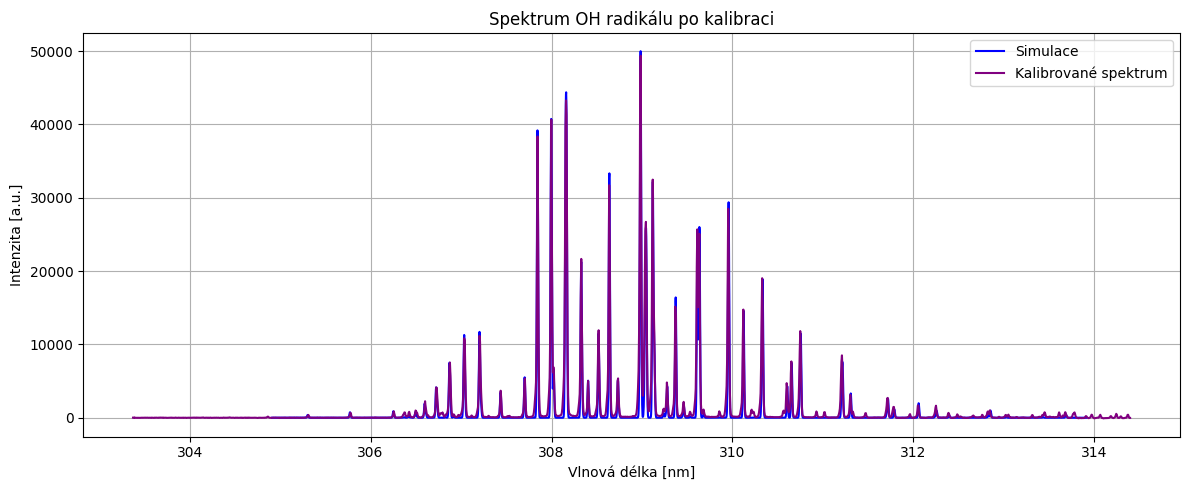

np.float64(-3.955552499999982)

In [151]:


# Najdeme pět nejvýraznějších píků v oblasti 307–309.5 nm
region = df_oh
peaks, _ = find_peaks(region["intensity"], distance=5, height=300)

region_sim = sim
peaks_sim, _ = find_peaks(region_sim["intensity"], distance=5, height=300)


# Získání pozic peaků
peak_data = region.iloc[peaks].sort_values(by="intensity", ascending=False).head(4)
peak_data = peak_data.sort_values(by="lambda_nm").reset_index(drop=True)

peak_data_sim = region_sim.iloc[peaks_sim].sort_values(by="intensity", ascending=False).head(4)
peak_data_sim = peak_data_sim.sort_values(by="lambda_nm").reset_index(drop=True)



# Ensure the columns 'lambda_corr' and 'intensity_corr' exist before assignment
if "lambda_ref" not in df_oh.columns:
    df_oh["lambda_ref"] = np.nan
if "intensity_ref" not in df_oh.columns:
    df_oh["intensity_ref"] = np.nan


for i in range(len(peak_data)):
    #find row with lambda_nm = peak_data["lambda_nm"][i] in df_oh
    row = df_oh[(df_oh["lambda_nm"] == peak_data["lambda_nm"][i] )]
    df_oh.loc[row.index, "lambda_ref"] = peak_data_sim["lambda_nm"][i]
    df_oh.loc[row.index, "intensity_ref"] = peak_data_sim["intensity"][i]
    df_oh.loc[row.index, "delta_lambda"] = peak_data["lambda_nm"][i] - peak_data_sim["lambda_nm"][i]


    


df_oh_peaks = df_oh.dropna(subset=["lambda_ref", "intensity_ref"])
print(df_oh_peaks)

delta = df_oh_peaks["delta_lambda"].mean()
df_oh["lambda_nm_corr"] = df_oh["lambda_nm"] - delta




df_oh_peaks["lambda_nm_corr"] = df_oh_peaks["lambda_nm"] - delta


#plot delta vs lambda
plt.figure(figsize=(12, 5))
plt.scatter(df_oh_peaks["lambda_nm"], df_oh_peaks["delta_lambda"], color='black', label='Odchylka')
#linregression line
from sklearn.linear_model import LinearRegression
X = df_oh_peaks["lambda_nm"].values.reshape(-1, 1)
y = df_oh_peaks["delta_lambda"].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
plt.plot(df_oh_peaks["lambda_nm"], model.predict(X), color='red', label=f"lineární regrese: $y = {slope:.3f}x + {intercept:.3f}$")
plt.legend()

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Odchylka [nm]")
plt.title("Odchylka vlnových délek čar OH radikálu")
plt.ylim(-3.97,-3.94)
plt.grid(True)
plt.tight_layout()
plt.show()

df_oh["delta2"] = df_oh["lambda_nm"]*slope + intercept 
df_oh["lambda_nm_corr2"] = df_oh["lambda_nm"] - df_oh["delta2"]


#odstranění temného proudu
dark_current_region = df_oh[(df_oh["lambda_nm_corr2"] >= 304) & (df_oh["lambda_nm_corr2"] <= 304.5)]
df_oh["intensity_corr"] = df_oh["intensity"] - dark_current_region["intensity"].mean()



df_oh["lambda_nm_corr"] = df_oh["lambda_nm"] - delta
print(df_oh)



# Vykreslení spektra s označenými píky
plt.figure(figsize=(12, 5))
plt.plot(sim["lambda_nm"], sim["intensity"], color='blue', label="Simulace")
#plt lambda_nm_corr2
plt.plot(df_oh["lambda_nm_corr2"], df_oh["intensity_corr"], color='purple', label="Kalibrované spektrum")
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum OH radikálu po kalibraci")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

delta

In [76]:
print(peak_data)

   lambda_nm     intensity  lambda_ref  intensity_ref  delta_lambda  \
0  303.88242  38622.666656    307.8449       39197.95      -3.96248   
1  304.03680  40900.666656    307.9970       40758.60      -3.96020   
2  304.20300  43544.333313    308.1620       44390.55      -3.95900   
3  305.04437  49638.333313    308.9849       50000.00      -3.94053   

   lambda_nm_corr    delta2  lambda_nm_corr2  intensity_corr  
0      307.837972 -3.963481       307.845901    37283.256680  
1      307.992353 -3.960490       307.997290    39561.256680  
2      308.158552 -3.957270       308.160270    42204.923337  
3      308.999923 -3.940969       308.985339    48298.923337  


    lambda_nm     intensity   FWHM_nm  lambda_nm_ref    N      S
0  307.845901  38365.415686  0.017485        307.843  1.0  0.563
1  307.997290  40643.415686  0.017485        307.996  2.0  1.065
2  308.328967  21662.749029  0.017445        308.326  4.0  2.100
3  308.520797  11930.749029  0.017445        308.512  5.0  2.640
4  308.735760   5361.082342  0.017416        308.733  6.0  3.160


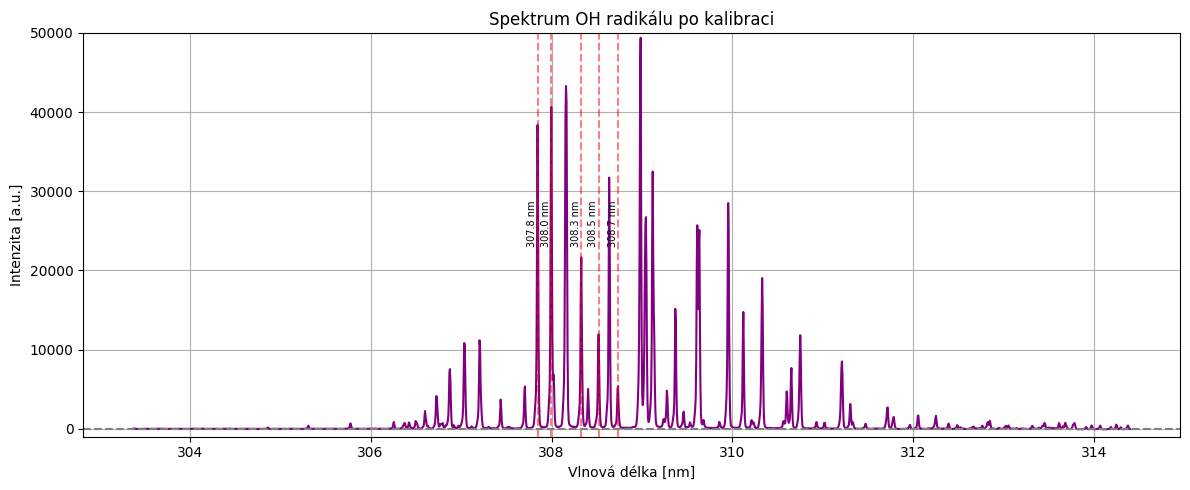

In [152]:
reference_lines = pd.DataFrame({
   "N": [1, 2, 4, 5, 6],
  "lambda_nm_ref": [307.843, 307.996, 308.326, 308.512, 308.733],
 "S": [0.563, 1.065, 2.100, 2.640, 3.160]
})

# Rebuild peak_df z aktuálních dat
peaks, _ = find_peaks(df_oh["intensity_corr"], height=1500, distance=5)
# Ensure that results_half is calculated for the correct peaks
results_half = peak_widths(df_oh["intensity_corr"], peaks, rel_height=0.5)

# Extract left and right lambda values for the peaks
left_lambda = df_oh["lambda_nm_corr2"].iloc[results_half[2].astype(int)].values
right_lambda = df_oh["lambda_nm_corr2"].iloc[results_half[3].astype(int)].values

# Ensure that the lengths of peaks, left_lambda, and right_lambda match
if len(peaks) == len(left_lambda) == len(right_lambda):
    fwhm_values = right_lambda - left_lambda
    peak_df = pd.DataFrame({
        "lambda_nm": df_oh["lambda_nm_corr2"].iloc[peaks].values,
        "intensity": df_oh["intensity_corr"].iloc[peaks].values,
        "FWHM_nm": fwhm_values
    })
else:
    raise ValueError("Mismatch in lengths of peaks and FWHM calculation arrays.")

#Spárování s tabulkou 
tolerance = 0.05
matched_lines = []
matched_df = pd.DataFrame()

for _, row in peak_df.iterrows():
    lamb = row["lambda_nm"]
    candidates = reference_lines[(reference_lines["lambda_nm_ref"] >= lamb - tolerance) & (reference_lines["lambda_nm_ref"] <= lamb + tolerance)]
    if not candidates.empty:
        closest = candidates.iloc[(candidates["lambda_nm_ref"] - lamb).abs().argmin()]
        matched_lines.append({
            "lambda_nm": lamb,
            "intensity": row["intensity"],
            "FWHM_nm": row["FWHM_nm"],
            "lambda_nm_ref": closest["lambda_nm_ref"],
            "N": closest["N"],
            "S": closest["S"]
        })

matched_df = pd.DataFrame(matched_lines)
print(matched_df)
# Tabulkové hodnoty

#plot
plt.figure(figsize=(12, 5))
plt.plot(df_oh["lambda_nm_corr2"], df_oh["intensity_corr"], color='purple', label="Kalibrované spektrum")
for i in range(len(matched_df)):
    plt.annotate(f"{matched_df['lambda_nm'][i]:.1f} nm", 
                 (matched_df["lambda_nm"][i], 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(matched_df["lambda_nm"][i], color='red', linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum OH radikálu po kalibraci")
plt.ylim(-1000, 50000)
plt.grid(True)
plt.tight_layout()
plt.show()



    lambda_nm     intensity   FWHM_nm  lambda_nm_ref    N      S  \
0  307.845901  38365.415686  0.017485        307.843  1.0  0.563   
1  307.997290  40643.415686  0.017485        307.996  2.0  1.065   
2  308.328967  21662.749029  0.017445        308.326  4.0  2.100   
3  308.520797  11930.749029  0.017445        308.512  5.0  2.640   
4  308.735760   5361.082342  0.017416        308.733  6.0  3.160   

   intensity_integrated         ln  
0            699.390888 -34.429300  
1            803.387698 -34.926156  
2            425.078463 -36.237377  
3            235.717356 -37.053371  
4            112.293854 -37.971892  


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\3627108187.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(region["intensity_corr"], region["lambda_nm_corr2"])


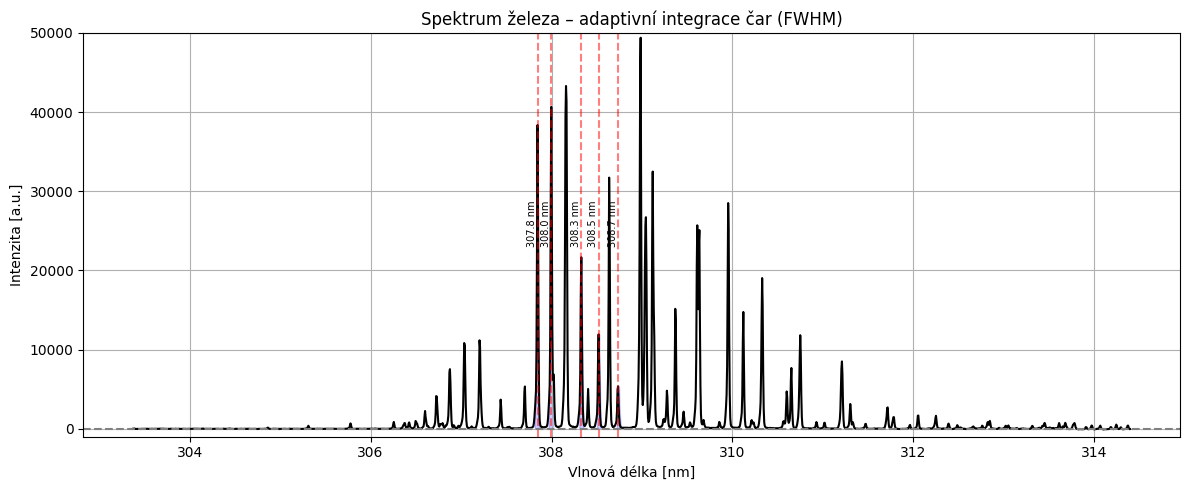

In [153]:
import numpy as np
# Integrace přes adaptivní okno ±1.2 * FWHM / 2
def integrate_dynamic(wavelength, fwhm):
    window = 3.25 * fwhm / 2
    region = df_oh[(df_oh["lambda_nm_corr2"] >= wavelength - window) & (df_oh["lambda_nm_corr2"] <= wavelength + window)]
    return np.trapz(region["intensity_corr"], region["lambda_nm_corr2"])

matched_df["intensity_integrated"] = matched_df.apply(
    lambda row: integrate_dynamic(row["lambda_nm"], row["FWHM_nm"]), axis=1
)
matched_df["intensity_integrated"] = matched_df["intensity_integrated"]
matched_df["ln"] = np.log(
    (matched_df["intensity_integrated"]   /((1e7/matched_df["lambda_nm"])**4*matched_df["S"])))
# Odstraníme případné nuly nebo nesmysly
#matched_df = matched_df[matched_df["intensity_integrated"] > 0].copy()
print(matched_df)
# Vykreslení integrace
plt.figure(figsize=(12, 5))
plt.plot(df_oh["lambda_nm_corr2"], df_oh["intensity_corr"], color='black')
for i in range(len(matched_df)):
    lam = matched_df["lambda_nm"].iloc[i]
    fwhm = matched_df["FWHM_nm"].iloc[i]
    window = 3.25 * fwhm / 2
    region = df_oh[(df_oh["lambda_nm_corr2"] >= lam - window) & (df_oh["lambda_nm_corr2"] <= lam + window)]
    plt.annotate(f"{lam:.1f} nm",
                 (lam, 25000),
                 textcoords="offset points", xytext=(-4,-10), ha='center', fontsize=7, rotation=90)
    plt.axvline(lam, color='red', linestyle='--', alpha=0.5)
    plt.fill_between(region["lambda_nm_corr"], region["intensity_corr"], alpha=0.2, color='blue')


plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Vlnová délka [nm]")
plt.ylabel("Intenzita [a.u.]")
plt.title("Spektrum železa – adaptivní integrace čar (FWHM)")
plt.ylim(-1000, 50000)
plt.grid(True)
plt.tight_layout()
plt.show()


    lambda_nm     intensity   FWHM_nm  lambda_nm_ref    N      S  \
0  307.845901  38365.415686  0.017485        307.843  1.0  0.563   
1  307.997290  40643.415686  0.017485        307.996  2.0  1.065   
2  308.328967  21662.749029  0.017445        308.326  4.0  2.100   
3  308.520797  11930.749029  0.017445        308.512  5.0  2.640   
4  308.735760   5361.082342  0.017416        308.733  6.0  3.160   

   intensity_integrated         ln    ln_term  
0            699.390888 -34.429300 -34.429300  
1            803.387698 -34.926156 -34.926156  
2            425.078463 -36.237377 -36.237377  
3            235.717356 -37.053371 -37.053371  
4            112.293854 -37.971892 -37.971892  


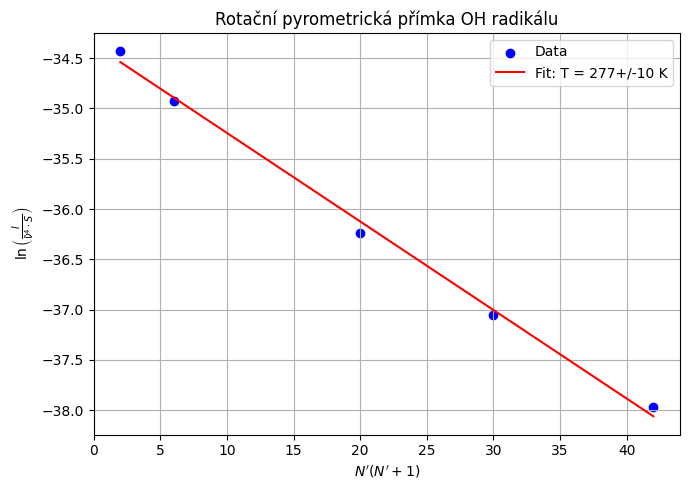

(277.1905968380248+/-10.445078942742972,
 -0.08806319111176701,
 np.float64(0.0033183917261441764))

In [154]:
from uncertainties import ufloat
oh_data = matched_df.copy()

# Výpočet vlnočtu [cm⁻¹]

# Výpočet logaritmu termu podle rovnice
oh_data["ln_term"] = oh_data["ln"]
print(oh_data)

# Výpočet x = N(N+1)
oh_data["x"] = oh_data["N"] * (oh_data["N"] + 1)

# Lineární regrese ln_term = a * x + b
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(oh_data["x"], oh_data["ln_term"])
slope = ufloat(slope, std_err)

# Konstanty
h = 6.62607015e-34      # Planck [J·s]
c = 2.99792458e8       # speed of light [cm/s]
k = 1.380649e-23        # Boltzmann [J/K]
B_cm = 1696.6           # rotační konstanta [cm^-1]

# Výpočet teploty
#ln = -B_cm * h * c / (k * T_rot) * (N(N+1))
#slope = -B_cm * h * c / (k * T_rot)
T_rot = -B_cm * h * c / (slope * k)

# Graf rotační přímky
plt.figure(figsize=(7, 5))
plt.scatter(oh_data["x"], oh_data["ln_term"], label="Data", color="blue")
x_vals = np.linspace(oh_data["x"].min(), oh_data["x"].max(), 100)
slope = slope.nominal_value
plt.plot(x_vals, slope * x_vals + intercept, label=f"Fit: T = {T_rot:.0f} K", color="red")
plt.xlabel(r"$N'(N'+1)$")
plt.ylabel(r"$\ln\left(\frac{I}{\tilde{\nu}^4 \cdot S}\right)$")
plt.title("Rotační pyrometrická přímka OH radikálu")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

T_rot, slope, std_err
